App Rating Prediction Project 

Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

Loading the dataset

In [ ]:
dataset = pd.read_csv('googleplaystore.csv')
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Checking for null values

In [ ]:
dataset.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Droping the rows with null values and confirming it again.

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Checking the shape and data type.

In [ ]:
dataset.shape

(9360, 13)

In [ ]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


in the Size column there are some rows containing 'varies with device' which is not providing any information. So droping those columns.

In [ ]:
data = dataset[dataset['Size'].str.contains('Varies with device') == False]
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


Now in the Size column there are two types of data. Some rows are in M and some are in K. Diving the whole dataset into two one containing M and other K.

In [ ]:
data_Mb = data[data['Size'].str.contains('M')]
data_Mb

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


Now for M data set, from Size column getting rid of M.

In [ ]:
data_Mb['Size'] = data_Mb['Size'].str.extract('(\d+)')
data_Mb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up
10834,FR Calculator,FAMILY,4.0,7,2,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


After getting rid of M, chaniging the entire M dataset from string to integer and then multiplying it with 1000 to convert the MB into KB.

In [ ]:
data_Mb['Size'] = data_Mb['Size'].astype(int)
data_Mb['Size'] = 1000*data_Mb['Size']
data_Mb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2000,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up
10834,FR Calculator,FAMILY,4.0,7,2000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


Confirming thew data type for Size column of M dataset.

In [ ]:
data_Mb.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size                int64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Now same operation is done with K dataset like i did with M dataset except the multiplication part as the entire Size column in K dataset are in kb. 

In [ ]:
data_kb = data[data['Size'].str.contains('k')]
data_kb['Size'] = data_kb['Size'].str.extract('(\d+)')
data_kb['Size'] = data_kb['Size'].astype(int)
data_kb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201,"100,000+",Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23,"100,000+",Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up
384,Hangouts Dialer - Call Phones,COMMUNICATION,4.0,122498,79,"10,000,000+",Free,0,Everyone,Communication,"September 2, 2015",0.1.100944346,4.0.3 and up
450,Caller ID +,COMMUNICATION,4.0,9498,118,"1,000,000+",Free,0,Everyone,Communication,"June 7, 2016",5.28.0,2.3 and up
458,GO Notifier,COMMUNICATION,4.2,124346,695,"10,000,000+",Free,0,Everyone,Communication,"July 6, 2014",2.8,2.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10732,Draw with FP sDraw,TOOLS,4.3,3268,467,"100,000+",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,"10,000+",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
10763,FP Разбитый дисплей,FAMILY,4.5,922,552,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
10832,FR Tides,WEATHER,3.8,1195,582,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


Now merging both the K and M dataset and renaming it new_data.

In [ ]:
new_data = pd.concat([data_Mb,data_kb])
new_data = new_data.reset_index()
new_data

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,"100,000+",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,"10,000+",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,10832,FR Tides,WEATHER,3.8,1195,582,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


Resetting the Index.

In [ ]:
new_data = new_data.reset_index()
new_data

,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,7718,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,"100,000+",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,7719,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,"10,000+",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,7720,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,7721,10832,FR Tides,WEATHER,3.8,1195,582,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


Dropping the level_0 and index column.

In [ ]:
new_data = new_data.drop(['level_0','index'], axis = 1)
new_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,Draw with FP sDraw,TOOLS,4.3,3268,467,"100,000+",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,"10,000+",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,FP Разбитый дисплей,FAMILY,4.5,922,552,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,FR Tides,WEATHER,3.8,1195,582,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


In the Review column of new_data one row contains '3.0M' which is not providing any necessary information. So removing this row.

In [ ]:
new_data = new_data[new_data['Reviews'].str.contains('3.0M') == False]
new_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,Draw with FP sDraw,TOOLS,4.3,3268,467,"100,000+",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,"10,000+",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,FP Разбитый дисплей,FAMILY,4.5,922,552,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,FR Tides,WEATHER,3.8,1195,582,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


Checking the data type for Review column.

In [ ]:
new_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size                int64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Reviews should be integer type biut it is in object type data. So converting the Reviews from object to integer.

In [ ]:
new_data['Reviews'] = new_data['Reviews'].astype(int)

Confirming the data type of Reviews.

In [ ]:
new_data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size                int64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Install column of new_data contains some unnecessary symbols like '+' and ','. So getting rid of these symbols. Also converting the data type of Install from object to integer.

In [ ]:
new_data['Installs'] = new_data['Installs'].map(lambda x:str(x).replace('+',''))
new_data['Installs'] = new_data['Installs'].map(lambda x:str(x).replace(',',''))
new_data['Installs'] = new_data['Installs'].astype(int)

In [ ]:
new_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,Draw with FP sDraw,TOOLS,4.3,3268,467,100000,Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,10000,Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,FP Разбитый дисплей,FAMILY,4.5,922,552,50000,Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,FR Tides,WEATHER,3.8,1195,582,100000,Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


Confirming the data type of Install.

In [ ]:
new_data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size                int64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Price column contails '$' symbol. So getting rid of that symbol and then converting the data type of Price from object to float.

In [ ]:
new_data['Price'] = new_data['Price'].map(lambda x:str(x).replace('$',''))
new_data['Price'] = new_data['Price'].astype(float)

In [ ]:
new_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,Draw with FP sDraw,TOOLS,4.3,3268,467,100000,Free,0.0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,10000,Free,0.0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,FP Разбитый дисплей,FAMILY,4.5,922,552,50000,Free,0.0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,FR Tides,WEATHER,3.8,1195,582,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


Confirming the data type of Price column. 

In [ ]:
new_data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size                int64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

For proper analysis, only taking the apps whose rating is greater than 1 and less than 5 and dropping the other apps which do not lie in this range.

In [ ]:
new_data = new_data[(new_data['Rating'] > 1) & (new_data['Rating'] < 5)]
new_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,Draw with FP sDraw,TOOLS,4.3,3268,467,100000,Free,0.0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,10000,Free,0.0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,FP Разбитый дисплей,FAMILY,4.5,922,552,50000,Free,0.0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,FR Tides,WEATHER,3.8,1195,582,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


Those eho install the app can review for the app. So checking whether Install is greater than Reviews or not for all the app. If not than dropping those apps.

In [ ]:
new_data = new_data[(new_data['Installs']) > (new_data['Reviews'])]
new_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,Draw with FP sDraw,TOOLS,4.3,3268,467,100000,Free,0.0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,10000,Free,0.0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,FP Разбитый дисплей,FAMILY,4.5,922,552,50000,Free,0.0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,FR Tides,WEATHER,3.8,1195,582,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


There are two types of apps i.e Free and Paid. So for Free type apps Price should be 0 and for Paid type apps Price is greater than 0. If any app is not following this two conditions then i am dropping those apps from the dataset.

In [ ]:
new_data_1 = new_data.query('Type=="Free" and Price == 0' )
new_data_2 = new_data.query('Type=="Paid" and Price > 0' )
new_data = pd.concat([new_data_1,new_data_2])
new_data = new_data.reset_index().drop(['index'],axis = 1)
new_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7432,ExDialer PRO Key,COMMUNICATION,4.5,5474,17,100000,Paid,3.99,Everyone,Communication,"January 15, 2014",81,2.1 and up
7433,Smart Wi-Fi Hotspot PRO,COMMUNICATION,3.7,197,957,10000,Paid,2.99,Everyone,Communication,"February 10, 2016",1.0,2.2 and up
7434,Portable Wi-Fi hotspot Premium,COMMUNICATION,3.7,481,420,10000,Paid,0.99,Everyone,Communication,"December 16, 2015",1.4.0.2,2.3 and up
7435,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,142,26,5000,Paid,1.00,Everyone,Tools,"June 26, 2011",1.0.0,2.1 and up


Plotting the Box plot for the Price.

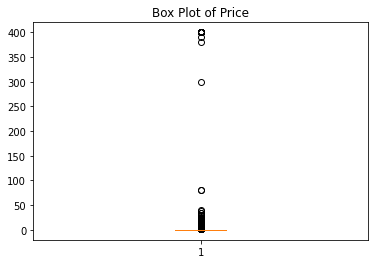

In [ ]:
plt.boxplot(new_data['Price'])
plt.title('Box Plot of Price')
plt.show()

We can clearly see  from the Price Box plot that there are outliers that means some apps have higher price. 

Plotting the Box plot for Reviews

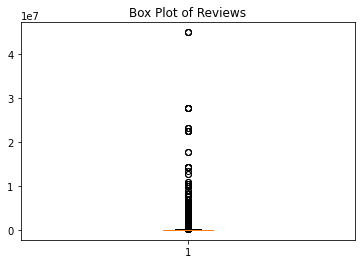

In [ ]:
plt.boxplot(new_data['Reviews'])
plt.title('Box Plot of Reviews')
plt.show()

From the Reviews Box Plot we can clearly say that there are so many outliers that means some apps have higher installs.

Plotting the Histogram for Rating

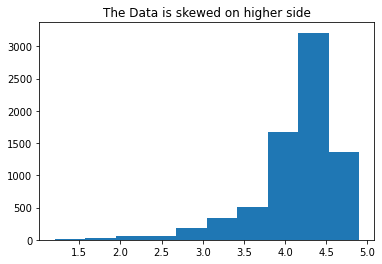

In [ ]:
plt.hist(new_data['Rating'])
plt.title('The Data is skewed on higher side')
plt.show()

From Rating histogram, we can clearly say that the data is skewed on the higher ratings i.e. most of the apps having higher ratings from 4 to 5. 

Plotting the histogram for Size

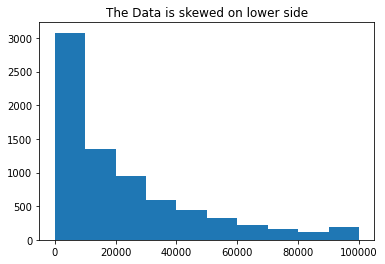

In [ ]:
plt.hist(new_data['Size'])
plt.title('The Data is skewed on lower side')
plt.show()

For Size histogram, we can clearly say that data is skewed on the lower side i.e most of the apps are in size below 20000 kb.

If price of an app is more than $200 then it is very suspicious. So dropping those apps from the data having Price more than 200.

In [ ]:
new_data = new_data[(new_data['Price'] < 200)]
new_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7432,ExDialer PRO Key,COMMUNICATION,4.5,5474,17,100000,Paid,3.99,Everyone,Communication,"January 15, 2014",81,2.1 and up
7433,Smart Wi-Fi Hotspot PRO,COMMUNICATION,3.7,197,957,10000,Paid,2.99,Everyone,Communication,"February 10, 2016",1.0,2.2 and up
7434,Portable Wi-Fi hotspot Premium,COMMUNICATION,3.7,481,420,10000,Paid,0.99,Everyone,Communication,"December 16, 2015",1.4.0.2,2.3 and up
7435,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,142,26,5000,Paid,1.00,Everyone,Tools,"June 26, 2011",1.0.0,2.1 and up


If Reviews for an app is more than 2 million then also it is suspicious. So dropping the apps having Reviews more than 2 milllions.

In [ ]:
new_data = new_data[(new_data['Reviews'] < 2000000)]
new_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7432,ExDialer PRO Key,COMMUNICATION,4.5,5474,17,100000,Paid,3.99,Everyone,Communication,"January 15, 2014",81,2.1 and up
7433,Smart Wi-Fi Hotspot PRO,COMMUNICATION,3.7,197,957,10000,Paid,2.99,Everyone,Communication,"February 10, 2016",1.0,2.2 and up
7434,Portable Wi-Fi hotspot Premium,COMMUNICATION,3.7,481,420,10000,Paid,0.99,Everyone,Communication,"December 16, 2015",1.4.0.2,2.3 and up
7435,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,142,26,5000,Paid,1.00,Everyone,Tools,"June 26, 2011",1.0.0,2.1 and up


In the Installs column, there are some outliers. Making the different percentiles i.e. 10,25,50,70,90,95,99 and checking for thresold value. 

In [ ]:
quartile_10 = np.percentile(new_data['Installs'],10)
quartile_25 = np.percentile(new_data['Installs'],25)
quartile_50 = np.percentile(new_data['Installs'],50)
quartile_70 = np.percentile(new_data['Installs'],70)
quartile_90 = np.percentile(new_data['Installs'],90)
quartile_95 = np.percentile(new_data['Installs'],95)
quartile_99 = np.percentile(new_data['Installs'],99)

In [ ]:
print(quartile_10,quartile_25,quartile_50,quartile_70,quartile_90,quartile_95,quartile_99)

1000.0 10000.0 100000.0 1000000.0 10000000.0 10000000.0 50000000.0


Plotting the Box Plot of Installs to understand about outliers which can help to decide the thresold value.

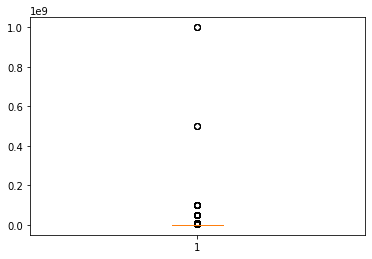

In [ ]:
plt.boxplot(new_data['Installs'])
plt.show()

From the Box Plot we can clealy see that only two points are above .4 and rest outliers are between o to o.2. Hence we can clearly tell that thresold value sholed be quartile_10 to quartile_70 as above quartile_70, we will see very small change in data.

In [ ]:
new_data_out = new_data[(new_data['Installs'] > quartile_10) & (new_data['Installs'] < quartile_70)]
new_data_out

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5000,50000,Free,0.00,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000,50000,Free,0.00,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7430,Advanced EX for RENAULT,TOOLS,2.8,130,143,5000,Paid,4.99,Everyone,Tools,"March 14, 2015",1.1,1.6 and up
7432,ExDialer PRO Key,COMMUNICATION,4.5,5474,17,100000,Paid,3.99,Everyone,Communication,"January 15, 2014",81,2.1 and up
7433,Smart Wi-Fi Hotspot PRO,COMMUNICATION,3.7,197,957,10000,Paid,2.99,Everyone,Communication,"February 10, 2016",1.0,2.2 and up
7434,Portable Wi-Fi hotspot Premium,COMMUNICATION,3.7,481,420,10000,Paid,0.99,Everyone,Communication,"December 16, 2015",1.4.0.2,2.3 and up


Plotting the scatter plot for Rating vs Price.

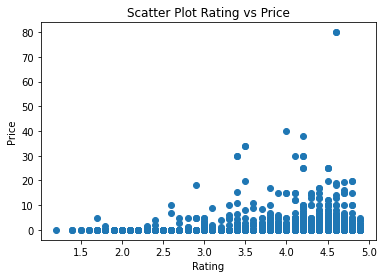

In [ ]:
plt.scatter(new_data['Rating'],new_data['Price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Scatter Plot Rating vs Price')
plt.show()

From Rating vs Price scatter plot, we can calearly say that apps having higher price having higher ratings. In other words, free app having ratings below 3 while paid apps having rating above 3.5.

Plotting scatter plot for Rating vs Size.

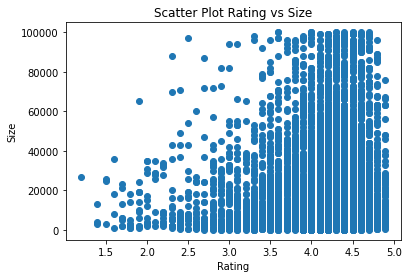

In [ ]:
plt.scatter(new_data['Rating'],new_data['Size'])
plt.xlabel('Rating')
plt.ylabel('Size')
plt.title('Scatter Plot Rating vs Size')
plt.show()

From Rating vs Size scatter plot, we can clearly say that app having low size i.e. below 40000 having ratings below 3 while apps having huge size i.e. above 40000 having rating above 3.5.

Plotting scatter plot for Rating vs Reviews.

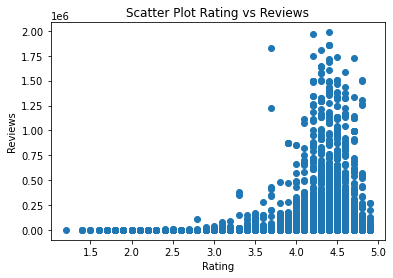

In [ ]:
plt.scatter(new_data['Rating'],new_data['Reviews'])
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.title('Scatter Plot Rating vs Reviews')
plt.show()

From rating vs Reviews scatter plot, we can clearly say that apps having reviews below 1 millions are rated below 4 while apps having reviews above 1 millions are rated between 4 to 4.8.

Plotting the Box plot for Rating vs Content Rating.

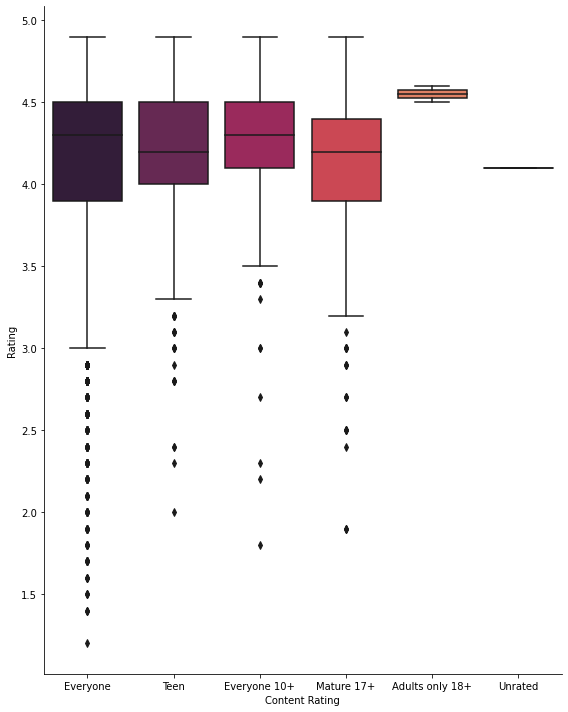

In [ ]:
sns.catplot(data = new_data,x = 'Content Rating',y = 'Rating',kind = 'box',palette = 'rocket',height=10,aspect = 0.8)

From Rating vs Content Rating Box plot, we can clealy say that all the content rating groups having higher median ratings except Unrated. Also lower whiskers is at arting 3 while upper is ta 4.8 though we can clealrly see outliers below lowers whiskers. Also the highest median rating is for Adults only 18+ group.

Plotting the Box plot for Rating vs category.

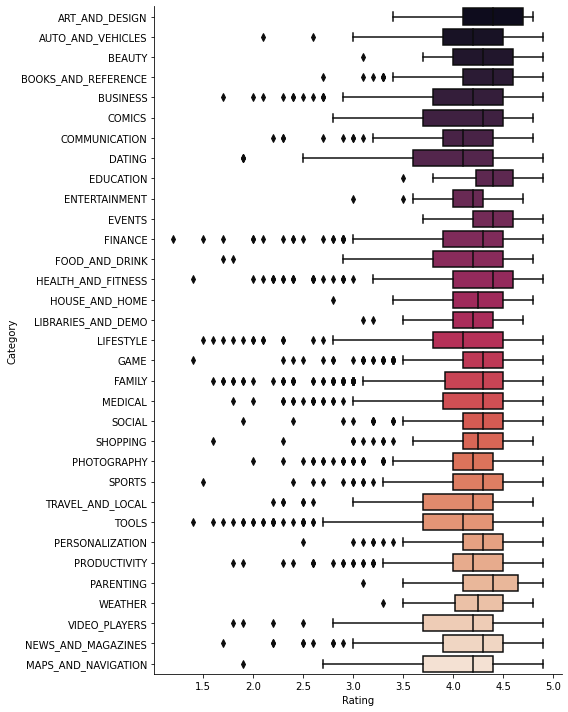

In [ ]:
sns.catplot(data = new_data,x = 'Rating',y = 'Category',kind = 'box',palette = 'rocket',height=10,aspect = 0.8,orient = "h")

From Rating vs Category Box plot, we can clearly say that median ratings for all the categories are in the range of 4 to 4.5 though we can see lots of outliers below 3.5 ratings for all categories.

Reviews and Install columns still having some values which are relatively high. So applying log tranformation on both the columns.

In [ ]:
to_log = ['Reviews','Installs']
df_log = new_data[to_log].applymap(lambda x: np.log(x+1))
df_log

,Reviews,Installs
0,5.075174,9.210440
1,6.875232,13.122365
2,11.379520,15.424949
3,12.281389,17.727534
4,6.875232,11.512935
...,...,...
7432,8.607948,11.512935
7433,5.288267,9.210440
7434,6.177944,9.210440
7435,4.962845,8.517393


In [ ]:
new_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7432,ExDialer PRO Key,COMMUNICATION,4.5,5474,17,100000,Paid,3.99,Everyone,Communication,"January 15, 2014",81,2.1 and up
7433,Smart Wi-Fi Hotspot PRO,COMMUNICATION,3.7,197,957,10000,Paid,2.99,Everyone,Communication,"February 10, 2016",1.0,2.2 and up
7434,Portable Wi-Fi hotspot Premium,COMMUNICATION,3.7,481,420,10000,Paid,0.99,Everyone,Communication,"December 16, 2015",1.4.0.2,2.3 and up
7435,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,142,26,5000,Paid,1.00,Everyone,Tools,"June 26, 2011",1.0.0,2.1 and up


Now adding the log transfomed columns into the dataset.

In [ ]:
new_data['Reviews'] = df_log['Reviews']
new_data['Installs'] = df_log['Installs']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
new_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000,9.210440,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000,13.122365,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8000,15.424949,Free,0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000,17.727534,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2000,11.512935,Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7432,ExDialer PRO Key,COMMUNICATION,4.5,8.607948,17,11.512935,Paid,3.99,Everyone,Communication,"January 15, 2014",81,2.1 and up
7433,Smart Wi-Fi Hotspot PRO,COMMUNICATION,3.7,5.288267,957,9.210440,Paid,2.99,Everyone,Communication,"February 10, 2016",1.0,2.2 and up
7434,Portable Wi-Fi hotspot Premium,COMMUNICATION,3.7,6.177944,420,9.210440,Paid,0.99,Everyone,Communication,"December 16, 2015",1.4.0.2,2.3 and up
7435,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,4.962845,26,8.517393,Paid,1.00,Everyone,Tools,"June 26, 2011",1.0.0,2.1 and up


Resetting the index.

In [ ]:
new_data = new_data.reset_index()
new_data

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000,9.210440,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000,13.122365,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8000,15.424949,Free,0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000,17.727534,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2000,11.512935,Free,0.00,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7198,7432,ExDialer PRO Key,COMMUNICATION,4.5,8.607948,17,11.512935,Paid,3.99,Everyone,Communication,"January 15, 2014",81,2.1 and up
7199,7433,Smart Wi-Fi Hotspot PRO,COMMUNICATION,3.7,5.288267,957,9.210440,Paid,2.99,Everyone,Communication,"February 10, 2016",1.0,2.2 and up
7200,7434,Portable Wi-Fi hotspot Premium,COMMUNICATION,3.7,6.177944,420,9.210440,Paid,0.99,Everyone,Communication,"December 16, 2015",1.4.0.2,2.3 and up
7201,7435,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,4.962845,26,8.517393,Paid,1.00,Everyone,Tools,"June 26, 2011",1.0.0,2.1 and up


Now dropping unnecessary columns like index, App, Last updated, Current version, Android version.

In [ ]:
new_data = new_data.drop(['index','App','Last Updated','Current Ver','Android Ver'], axis = 1)

In [ ]:
new_data

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000,9.210440,Free,0.00,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000,13.122365,Free,0.00,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8000,15.424949,Free,0.00,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,12.281389,25000,17.727534,Free,0.00,Teen,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2000,11.512935,Free,0.00,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
7198,COMMUNICATION,4.5,8.607948,17,11.512935,Paid,3.99,Everyone,Communication
7199,COMMUNICATION,3.7,5.288267,957,9.210440,Paid,2.99,Everyone,Communication
7200,COMMUNICATION,3.7,6.177944,420,9.210440,Paid,0.99,Everyone,Communication
7201,TOOLS,4.5,4.962845,26,8.517393,Paid,1.00,Everyone,Tools


In [ ]:
new_data.dtypes

Category           object
Rating            float64
Reviews           float64
Size                int64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

Now type column in the new_data is object type data which ML model is not going to understand as it understands only numeric data. So converting Type column into numeric and assigning Free = 0 and Paid = 1.  

In [ ]:
new_data['Type'] = new_data['Type'].apply(lambda x: 1 if x =='Paid' else 0).astype(int)
new_data

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000,9.210440,0,0.00,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000,13.122365,0,0.00,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8000,15.424949,0,0.00,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,12.281389,25000,17.727534,0,0.00,Teen,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2000,11.512935,0,0.00,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
7198,COMMUNICATION,4.5,8.607948,17,11.512935,1,3.99,Everyone,Communication
7199,COMMUNICATION,3.7,5.288267,957,9.210440,1,2.99,Everyone,Communication
7200,COMMUNICATION,3.7,6.177944,420,9.210440,1,0.99,Everyone,Communication
7201,TOOLS,4.5,4.962845,26,8.517393,1,1.00,Everyone,Tools


There are some categorical columns in the dataset i.e. Category, Content Rating, Genres. Creating dummies for those columns and renaming the new data as inp2.

In [ ]:
inp2 = pd.get_dummies(new_data, columns= ['Category','Content Rating','Genres'],drop_first = True)
inp2

,Rating,Reviews,Size,Installs,Type,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000,9.210440,0,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000,13.122365,0,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8000,15.424949,0,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,12.281389,25000,17.727534,0,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2000,11.512935,0,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7198,4.5,8.607948,17,11.512935,1,3.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7199,3.7,5.288267,957,9.210440,1,2.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7200,3.7,6.177944,420,9.210440,1,0.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7201,4.5,4.962845,26,8.517393,1,1.00,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Now splitting the dataset into train and test and naming them df_train and df_test.

In [ ]:
df_train,df_test = train_test_split(inp2,test_size= .3, random_state = 7)

In [ ]:
df_train

,Rating,Reviews,Size,Installs,Type,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
5915,3.5,3.401197,17000,6.908755,0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1335,4.1,13.419804,73000,17.727534,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2610,4.5,13.787375,20000,17.727534,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5118,4.1,6.809039,4000,10.819798,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4789,4.2,7.037028,11000,10.819798,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,4.1,3.583519,3000,10.819798,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2550,4.1,9.004300,3000,13.815512,0,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
537,4.0,6.728629,15000,11.512935,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1220,4.7,13.495165,31000,16.118096,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test

,Rating,Reviews,Size,Installs,Type,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
1163,4.7,12.790571,49000,16.118096,0,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3166,4.7,8.262043,63000,9.210440,0,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6716,4.3,5.948035,15000,9.210440,1,2.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1436,4.0,7.647309,23000,13.122365,0,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3111,2.3,1.386294,16000,6.908755,0,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,3.7,3.044522,8000,6.908755,0,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4200,4.8,10.011938,13000,13.122365,0,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1935,4.2,8.539542,62000,13.815512,0,0.00,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6756,4.8,2.564949,18000,6.908755,1,19.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now diving the df_train dataset into X-train and y_train on the basis of dependent and independent variables. As Rating is dependent variable, our y_train will contain only rating column and X_train will contain rest columns except rating. 

In [ ]:
X_train = df_train.iloc[:,1:]
X_train

,Reviews,Size,Installs,Type,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
5915,3.401197,17000,6.908755,0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1335,13.419804,73000,17.727534,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2610,13.787375,20000,17.727534,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5118,6.809039,4000,10.819798,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4789,7.037028,11000,10.819798,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,3.583519,3000,10.819798,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2550,9.004300,3000,13.815512,0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
537,6.728629,15000,11.512935,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1220,13.495165,31000,16.118096,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = df_train['Rating']
y_train

5915    3.5
1335    4.1
2610    4.5
5118    4.1
4789    4.2
       ... 
5699    4.1
2550    4.1
537     4.0
1220    4.7
4271    4.5
Name: Rating, Length: 5042, dtype: float64

Now diving the df_test dataset into X-test and y_test on the basis of dependent and independent variables. As Rating is dependent variable, our y_test will contain only rating column and X_test will contain rest columns except rating. 

In [ ]:
X_test = df_test.iloc[:,1:]
X_test

,Reviews,Size,Installs,Type,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
1163,12.790571,49000,16.118096,0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3166,8.262043,63000,9.210440,0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6716,5.948035,15000,9.210440,1,2.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1436,7.647309,23000,13.122365,0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3111,1.386294,16000,6.908755,0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,3.044522,8000,6.908755,0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4200,10.011938,13000,13.122365,0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1935,8.539542,62000,13.815512,0,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6756,2.564949,18000,6.908755,1,19.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_test = df_test['Rating']
y_test

1163    4.7
3166    4.7
6716    4.3
1436    4.0
3111    2.3
       ... 
3644    3.7
4200    4.8
1935    4.2
6756    4.8
2297    4.2
Name: Rating, Length: 2161, dtype: float64

Now importing the Linear Regression model from sklearn and then cfreating our model while fitting it inot X_train and y_train.

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model = lr_model.fit(X_train,y_train)


As our model is ready, lets do the prediction using our X_test data.

In [ ]:
y_pred = lr_model.predict(X_test)

We got our prediction and now need to check how good model is working. To check that impoerting R2 score from sklearn and then checking R2 value for y_test and y_pred.

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.15023445000400037

We got our R2 value .1502.As the R squared value is 0.15 which is less than 0.3, we can say that the independent variables have week influnence on dependent variable. 